# **Scenario for Analysis**

Im a Data Analyst at Netflix, and I have been asked to create a presentation that helps the Content Strategy Team understand the current trends in the content library. The goal is to identify content types, regional production strengths, release year trends, and popular genres to guide future acquisitions.

In [1]:
# Importing libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('netflix_titles.csv')

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
 #Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# **I'll use the Netflix brand colours**
https://brand.netflix.com/en/assets/brand-symbol/

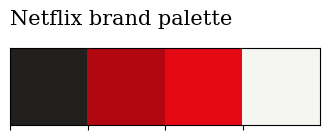

In [7]:
# Palette
netflix_palette = ['#221f1f', '#b20710', '#e50914','#f5f5f1'] # Define netflix_palette here
sns.palplot(netflix_palette)

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

# **Chart 1: Content Type Distribution (Bar Chart) **

Distribution of Content Types on Netflix This bar chart shows that Movies dominate the Netflix library, with a significantly higher count compared to TV Shows. This insight is important for understanding where Netflix places most of its content investment and where they may want to balance the offerings

<ipython-input-8-c8837c64d519>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette=netflix_palette[:2])  # Only two types


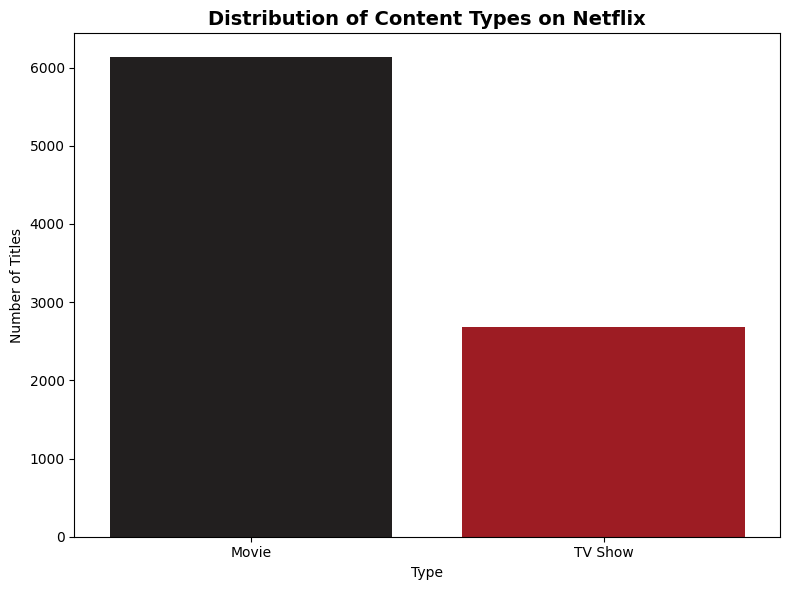

In [8]:
# Before creating the barplot
type_counts = df['type'].value_counts() # Create type_counts here

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette=netflix_palette[:2])  # Only two types
plt.title("Distribution of Content Types on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


# **Chart 2: Top 5 Countries by Titles (Pie Chart)**

This pie chart reveals that the United States contributes the largest share of Netflix titles, followed by India, United Kingdom, Canada, and France. This breakdown helps the content team see where Netflix’s international presence is most prominent and where new opportunities may lie.

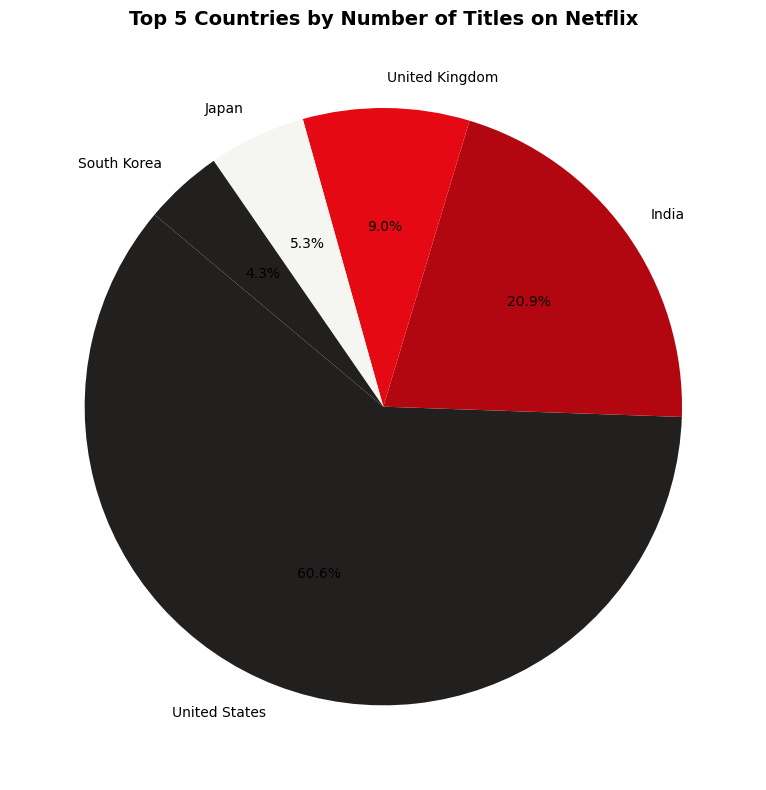

In [9]:
# Extract top countries by number of titles
top_countries = df['country'].value_counts().head(5)  # Get top 5 countries

# Netflix brand colors
netflix_palette = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']

# Create the pie chart

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%',
        colors=netflix_palette, startangle=140, textprops={'color': 'black'})
plt.title("Top 5 Countries by Number of Titles on Netflix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# **Chart 3: Titles Added per Year (Line Chart)**
This line chart shows the number of titles added to Netflix each year. It reveals the platform's content growth over time—highlighting periods when significant content expansions occurred. This information is useful for the team to understand strategic content pushes and market trends.

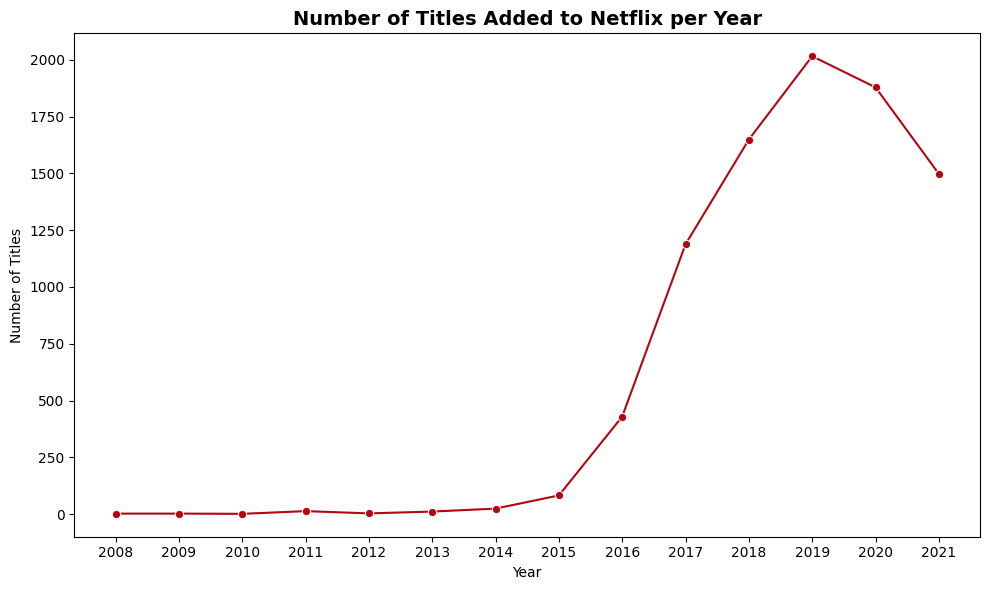

In [10]:
plt.figure(figsize=(10, 6))
# Create content_per_year, assuming the column is named 'date_added'
content_per_year = df['date_added'].str.extract('(\d{4})', expand=False).value_counts().sort_index()
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o', color=netflix_palette[1])
plt.title("Number of Titles Added to Netflix per Year", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

# **Chart 4: Top 10 Most Common Genres (Horizontal Bar Chart)**

This horizontal bar chart displays the top 10 genres on Netflix by title count. It shows which genres are most prevalent in the catalog, giving the content team clear insight into viewer preferences and helping identify areas for potential content development.



<ipython-input-11-ce8a5ea85e72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette=netflix_palette)
<ipython-input-11-ce8a5ea85e72>:4: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_genres.values, y=top_genres.index, palette=netflix_palette)


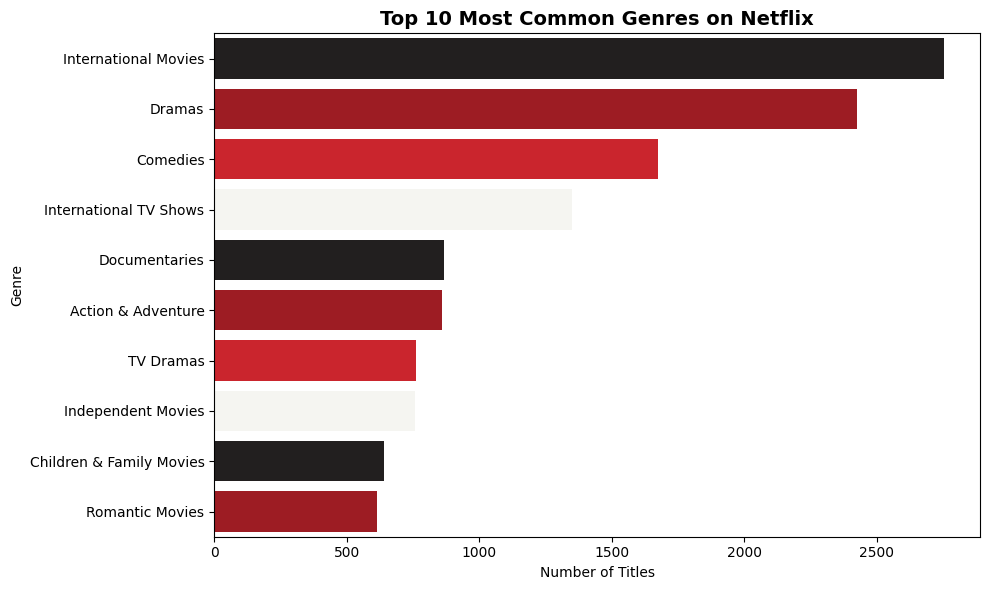

In [11]:
plt.figure(figsize=(10, 6))
# Calculate top_genres from the 'listed_in' column
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette=netflix_palette)
plt.title("Top 10 Most Common Genres on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()

# **Chart 5: Distribution of Content Ratings (Horizontal Bar Chart)**
This count plot illustrates the distribution of Netflix titles across different rating categories (e.g., TV-MA, PG-13). It demonstrates how Netflix caters to various audiences—from mature viewers to family-friendly content—informing strategies for targeting and diversifying the content mix.

<ipython-input-12-084d9527cfd2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette=netflix_palette)
<ipython-input-12-084d9527cfd2>:2: UserWarning: 
The palette list has fewer values (4) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette=netflix_palette)


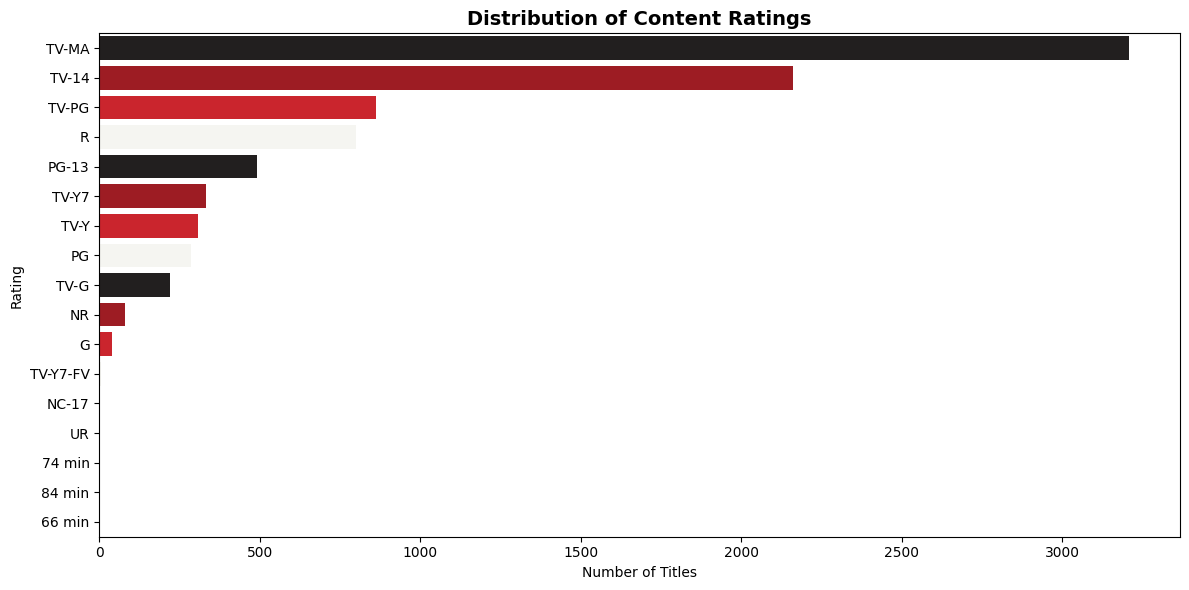

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette=netflix_palette)
plt.title("Distribution of Content Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

# **Chart 6: Top 10 Directors with the Most Titles on Netflix**
This horizontal bar chart highlights the directors with the most titles available on Netflix. It helps identify filmmakers with a strong presence on the platform and may guide future collaborations or featured collections based on popular creators.

<ipython-input-13-49e856fda31b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette=netflix_palette)
<ipython-input-13-49e856fda31b>:6: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_directors.values, y=top_directors.index, palette=netflix_palette)


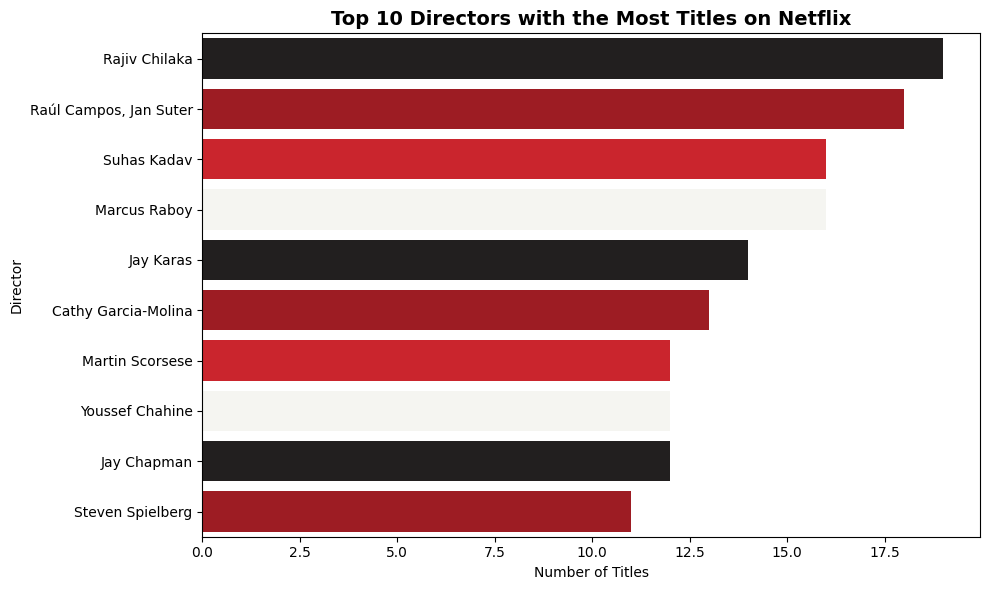

In [13]:
# Clean and count directors
top_directors = df['director'].dropna().value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette=netflix_palette)
plt.title("Top 10 Directors with the Most Titles on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

# **Chart 7: Distribution of Movie Durations on Netflix**

This histogram shows how long most movies on Netflix are. The majority fall between 80 and 120 minutes, suggesting Netflix prioritizes standard-length feature films. This helps content strategists understand runtime preferences and optimize production accordingly.



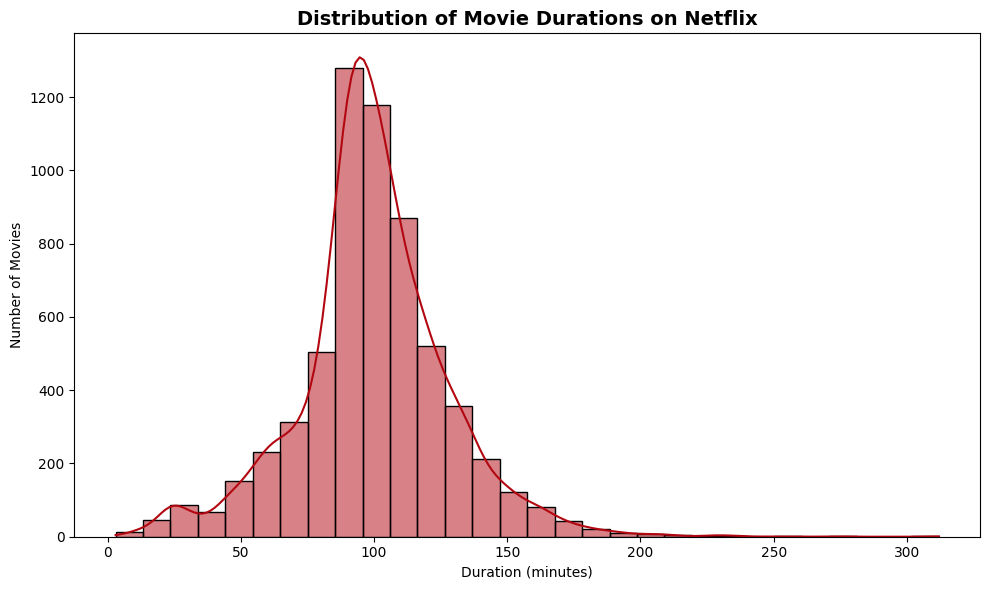

In [14]:
# Filter only movies and extract duration (in minutes)
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(movies['duration'].dropna(), bins=30, color=netflix_palette[1], kde=True)
plt.title("Distribution of Movie Durations on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

# **Chart 8: Top 10 Ratings by Content Type**

This stacked bar chart compares how Movies and TV Shows are distributed across the most common rating categories. It reveals that mature ratings like TV-MA are more common for both types, while some ratings (e.g., TV-Y) are exclusive to TV content, giving a breakdown of content maturity by format.

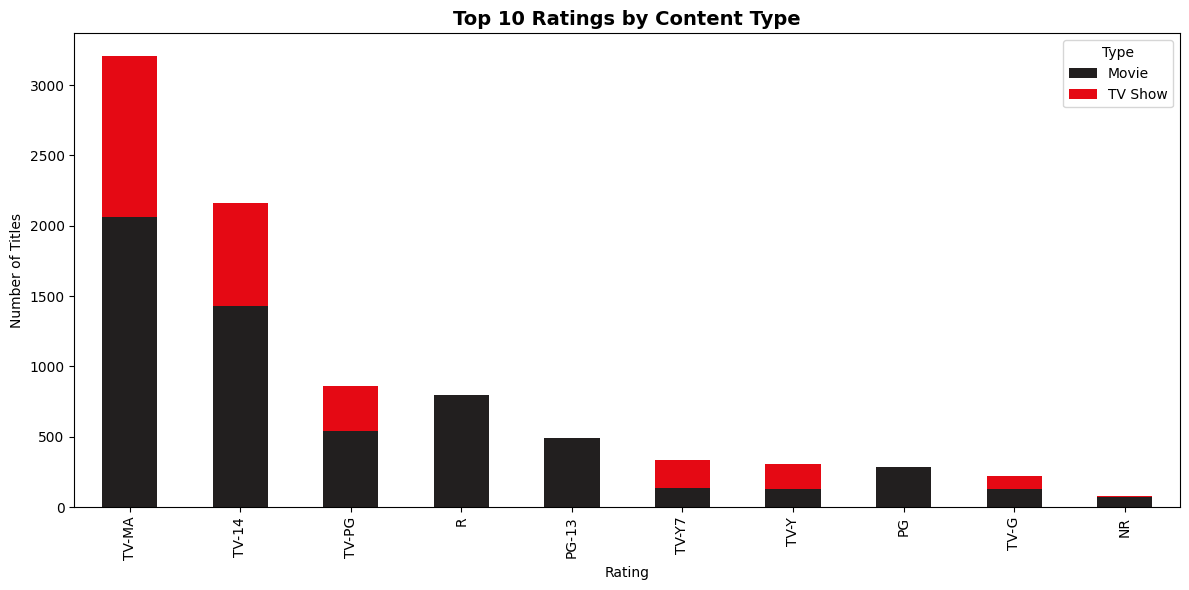

In [15]:
# Count type by rating
rating_type = df.groupby(['rating', 'type']).size().unstack().fillna(0)

# Plot
rating_type.loc[rating_type.sum(axis=1).sort_values(ascending=False).index[:10]].plot(
    kind='bar', stacked=True, color=[netflix_palette[0], netflix_palette[2]], figsize=(12, 6)
)
plt.title("Top 10 Ratings by Content Type", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

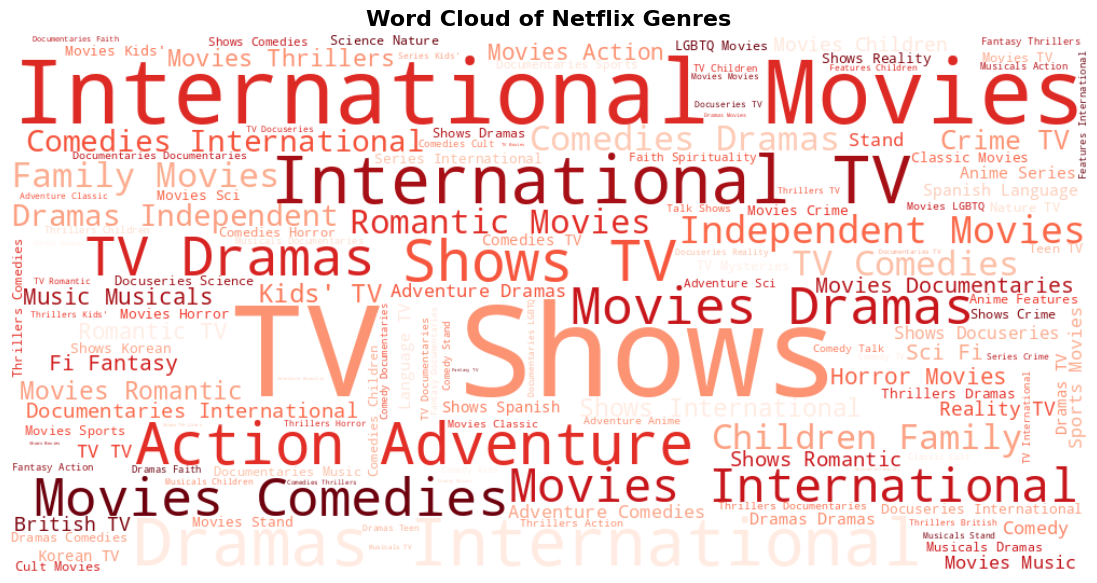

In [17]:
from wordcloud import WordCloud

# Extract genres and join them into a single string
genres = df['listed_in'].str.split(', ').explode()  # Assuming 'listed_in' contains genre info
genres_text = ' '.join(genres.dropna())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Reds').generate(genres_text)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Genres", fontsize=16, fontweight='bold')
plt.show()

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
